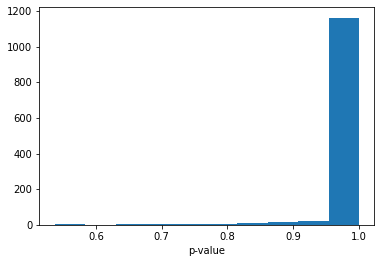

In [1]:
import networkx as nx
import EoN as EoN
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import ks_2samp
import itertools
import random

random.seed(3)

#UDD
G = nx.configuration_model([3]*10000)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N

degree_dists=[[]]
for i in range(50):
    IC = defaultdict(lambda: 'S')
    for node in range(10):
        IC[node] = 'I'

    return_statuses = ('S', 'E', 'I', 'R')

    sim=EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = 20, return_full_data = True)
    degree_dists.append([sim.transmission_tree().degree(n) for n in sim.transmission_tree().nodes()])
degree_dists.pop(0)
pair_list = list(itertools.combinations(degree_dists,2))
ks2s = []
for i in range(len(pair_list)):
    ks2s.append(ks_2samp(list(pair_list)[i][0],list(pair_list)[i][1])[1])
plt.hist(ks2s)
plt.xlabel("p-value")
plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

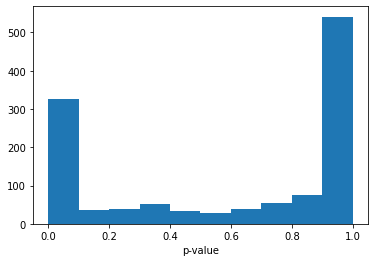

In [2]:
random.seed(3)

#PLDD
sequence = nx.random_powerlaw_tree_sequence(10000, tries=1000000)
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N

degree_dists=[[]]
for i in range(50):
    IC = defaultdict(lambda: 'S')
    for node in range(10):
        IC[node] = 'I'

    return_statuses = ('S', 'E', 'I', 'R')

    sim=EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = 20, return_full_data = True)
    degree_dists.append([sim.transmission_tree().degree(n) for n in sim.transmission_tree().nodes()])
    print(i, end=" ")
degree_dists.pop(0)
pair_list = list(itertools.combinations(degree_dists,2))
ks2s = []
for i in range(len(pair_list)):
    ks2s.append(ks_2samp(list(pair_list)[i][0],list(pair_list)[i][1])[1])
plt.hist(ks2s)
plt.xlabel("p-value")
plt.show()

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

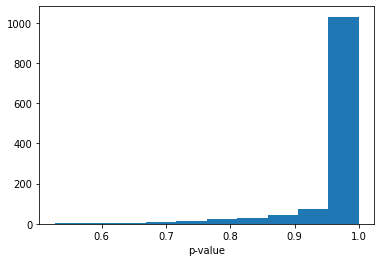

In [5]:
import numpy as np
random.seed(3)

#PDD
sequence=[1]
while sum(sequence)%2==1:
    sequence = np.random.poisson(1,10000)+1
G = nx.configuration_model(sequence)
G.remove_edges_from(nx.selfloop_edges(G))
G = nx.Graph(G)

node_attribute_dict = {node: 0.5+random.random() for node in G.nodes()}
edge_attribute_dict = {edge: 0.5+random.random() for edge in G.edges()}

nx.set_node_attributes(G, values=node_attribute_dict, name='expose2infect_weight')
nx.set_edge_attributes(G, values=edge_attribute_dict, name='transmission_weight')

N = G.order()
H = nx.DiGraph()

H.add_node('S') #This line is actually unnecessary since 'S' does not change status intrinsically
#
H.add_edge('E', 'I', rate = 0.5, weight_label='expose2infect_weight')
#  The line above states that the transition from 'E' to 'I' occurs with rate
#  0.5  times  whatever value is in the individual's attribute 'expose2infect_weight'
#
H.add_edge('I', 'R', rate = 0.14)
#  The line above states that the I to 'R' transition occurs with rate 0.1
#  and does not depend on any attribute

J = nx.DiGraph()
J.add_edge(('I', 'S'), ('I', 'E'), rate = 0.5, weight_label='transmission_weight')
#  The line above states that an 'I' individual will cause an 'S' individual
#  to transition to 'E' with rate equal to 0.5 times the partnership's attribute
#  'transmission_weight'.

rho = 1./N

degree_dists=[[]]
for i in range(50):
    IC = defaultdict(lambda: 'S')
    for node in range(10):
        IC[node] = 'I'

    return_statuses = ('S', 'E', 'I', 'R')

    sim=EoN.Gillespie_simple_contagion(G, H, J, IC, return_statuses, tmax = 60, return_full_data = True)
    degree_dists.append([sim.transmission_tree().degree(n) for n in sim.transmission_tree().nodes()])
    print(i, end=" ")
degree_dists.pop(0)
pair_list = list(itertools.combinations(degree_dists,2))
ks2s = []
for i in range(len(pair_list)):
    ks2s.append(ks_2samp(list(pair_list)[i][0],list(pair_list)[i][1])[1])
plt.hist(ks2s)
plt.xlabel("p-value")
plt.show()